In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model

%matplotlib inline

In [60]:
Location = r'/Users/Carlina/Documents/DataScience/DAT-NYC-37-master/DAT-NYC-37/projects/final-projects/Dataset/breast-cancer-wisconsin.csv'
df = pd.read_csv(Location)
df.head(5)

,ID,Clump_Thickness,Uniformaty_CellSize,Uniformity_cellshape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [61]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                        699 non-null int64
Clump_Thickness           699 non-null int64
Uniformaty_CellSize       699 non-null int64
Uniformity_cellshape      699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               683 non-null float64
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB
None


In [79]:
# dropping data with missing values
df_preprocessing = df.dropna()
print df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
ID                        683 non-null int64
Clump_Thickness           683 non-null int64
Uniformaty_CellSize       683 non-null int64
Uniformity_cellshape      683 non-null int64
marginal_adhesion         683 non-null int64
single_epithelial_size    683 non-null int64
bare_nuclei               683 non-null float64
bland_chromatin           683 non-null int64
normal_nucleoli           683 non-null int64
mitoses                   683 non-null int64
class                     683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB
None


In [63]:
df_preprocessing.corr()

,ID,Clump_Thickness,Uniformaty_CellSize,Uniformity_cellshape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
ID,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump_Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformaty_CellSize,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity_cellshape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single_epithelial_size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


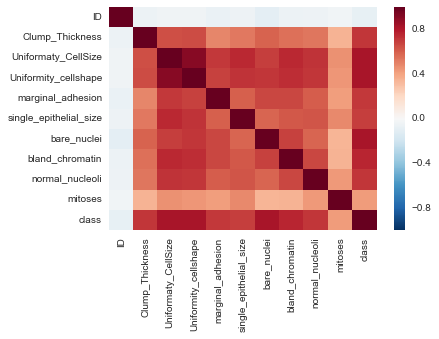

In [64]:
sns.heatmap(df_preprocessing.corr());

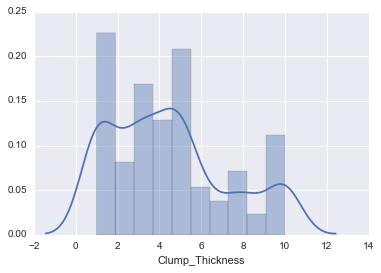

In [80]:
sns.distplot(df_preprocessing['Clump_Thickness']);

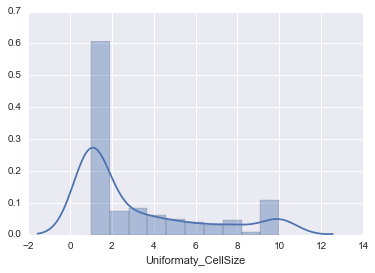

In [81]:
sns.distplot(df_preprocessing['Uniformaty_CellSize']);

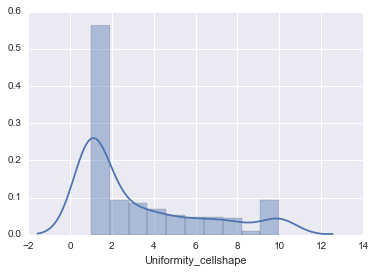

In [67]:
sns.distplot(df_preprocessing['Uniformity_cellshape']);

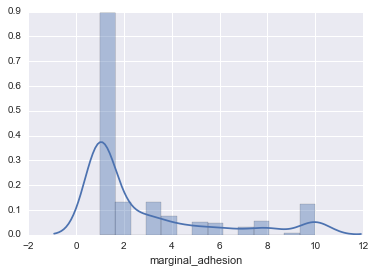

In [68]:
sns.distplot(df_preprocessing['marginal_adhesion']);

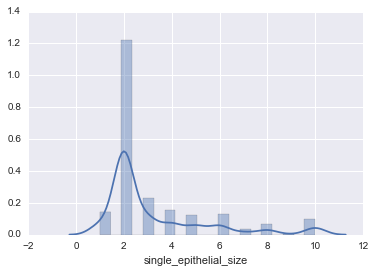

In [69]:
sns.distplot(df_preprocessing['single_epithelial_size']);

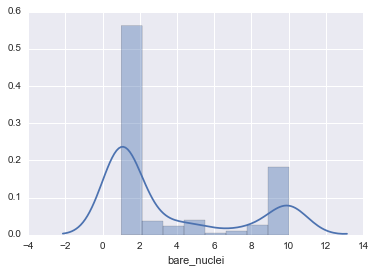

In [70]:
sns.distplot(df_preprocessing['bare_nuclei']);

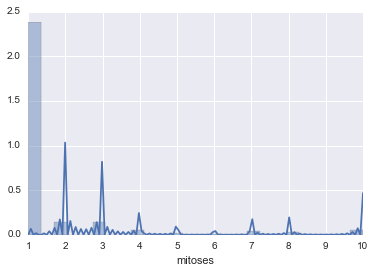

In [74]:
sns.distplot(df_preprocessing['mitoses']);

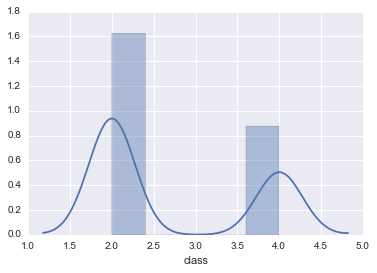

In [75]:
sns.distplot(df_preprocessing['class']);

In [87]:
# Dropping the columns I don't need for training
X = df_preprocessing.drop(['ID'], axis=1)
y = df_preprocessing['class']  
